<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/hw3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Necessary and sufficient conditions of local minimizers

### Unconstrained Optimization

Unconstrained optimization problems deal with finding a local or global minimizer of a function $ f : \mathbb{R}^d \to \mathbb{R} $. Formally, we can summarize them as:

$
\min_{x \in \mathbb{R}^d} f(x)
$

#### Global and Local Minimizers
- **Global Minimizer**: A point $ x^* \in \mathbb{R}^d $ is a global minimizer if:
  $
  f(x) \geq f(x^*), \quad \forall x \in \mathbb{R}^d.
  $
  This means that $ x^* $ has the lowest value across the entire domain of $ f $.
However, more often than not in data science, finding a global minimizer is challenging due to high complexity data such as high-dimensional data. In these cases, local minimizers are used. They don't guarantee the lowest value of a function across the entire domain but they provide a good enough value to use.
- **Local Minimizer**: A point $ x^* \in \mathbb{R}^d $ is a local minimizer if there exists an area around $ x^* $ where:
  $
  f(x) \geq f(x^*), \quad \forall x \in B_\delta(x^*) \setminus \{x^*\}.
  $
  If the inequality is strict, $ x^* $ is a *strict* local minimizer. This means $ x^* $ has the lowest value within a small region around it.

#### Descent Directions
- **Descent Direction**: A vector $ v \in \mathbb{R}^d $ is a descent direction for $ f $ at $ x_0 $ if there exists $ \alpha^* > 0 $ such that:
  $
  f(x_0 + \alpha v) < f(x_0), \quad \forall \alpha \in (0, \alpha^*).
  $
 - **Continuously differentiable**: a direction $ v $ is a descent direction if the directional derivative satisfies:
  $
  \nabla f(x_0)^T v < 0.
  $
  This allows us to find descent directions

#### Necessary Conditions for Local Minimizers
- **First-Order Necessary Condition**: If $ f $ is continuously differentiable and $ x_0 $ is a local minimizer, then:
  $
  \nabla f(x_0) = 0.
  $


- **Second-Order Necessary Condition**: If $ f $ is twice continuously differentiable and $ x_0 $ is a local minimizer, the Hessian matrix $ H_f(x_0) $ must be positive semi-definite (PSD):
  $
  v^T H_f(x_0) v \geq 0, \quad \forall v \in \mathbb{R}^d.
  $
  The Hessian being PSD ensures the function at $ x_0 $ does not indicate a direction of descent.

#### Sufficient Conditions for Local Minimizers
- **Second-Order Sufficient Condition**: If $ f $ is twice continuously differentiable and:
  - $ \nabla f(x_0) = 0 $,
  - $ H_f(x_0) $ is positive definite,
  $ x_0 $ is a *strict* local minimizer.




Global Minimizer (from optimization): [ 0.18181891 -0.36363664]
Function value at the minimizer: -0.3636363636358102

Checking if the point is a local minimizer:
Gradient at x = [ 0.18181891 -0.36363664]: [ 1.17034122e-06 -9.38296658e-07]
First-order condition not satisfied: Gradient is non-zero.
Hessian at x = [ 0.18181891 -0.36363664]: [[2 1]
 [1 6]]
Eigenvalues of Hessian: [1.76393202+0.j 6.23606798+0.j]
Second-order condition satisfied: Hessian is positive semi-definite.
Gradient at x = [ 0.18181891 -0.36363664]: [ 1.17034122e-06 -9.38296658e-07]
This is not a strict local minimizer.


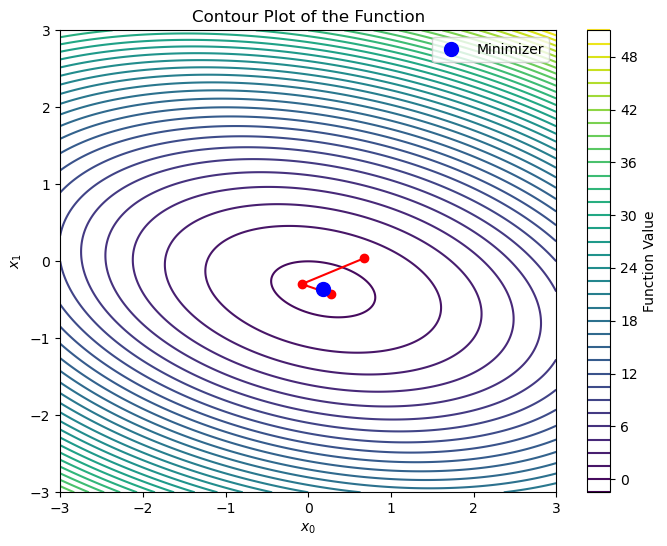

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.linalg import eigvals

#Define a quadratic function for demonstration (Source: ChatGPT)
def func(x):
    return x[0]**2 + 3*x[1]**2 + x[0]*x[1] + 2*x[1]

# Gradient (first derivative)
def grad_func(x):
    df_dx0 = 2*x[0] + x[1]
    df_dx1 = 6*x[1] + x[0] + 2
    return np.array([df_dx0, df_dx1])

# Hessian (second derivative matrix)
def hessian_func(x):
    d2f_dx0dx0 = 2
    d2f_dx0dx1 = 1
    d2f_dx1dx1 = 6

    return np.array([[d2f_dx0dx0, d2f_dx0dx1],
                     [d2f_dx0dx1, d2f_dx1dx1]])

# Plot the function as a contour plot
def plot_function_contour():
    x0_vals = np.linspace(-3, 3, 400)
    x1_vals = np.linspace(-3, 3, 400)
    X0, X1 = np.meshgrid(x0_vals, x1_vals)

    Z = func([X0, X1])

    plt.contour(X0, X1, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Function Value')
    plt.title("Contour Plot of the Function")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")

# Visualize the optimization steps (Source: ChatGPT)
def plot_optimization_path(steps):
    for i, x in enumerate(steps):
        plt.plot(x[0], x[1], 'ro')  # Red dots for optimization steps
        if i > 0:
            plt.plot([steps[i-1][0], x[0]], [steps[i-1][1], x[1]], 'r-')  # Line connecting steps

# Store steps for plotting optimization path
steps = []
def callback(xk):
    steps.append(xk)

# Descent direction check
def is_descent_direction(grad, direction):
    return np.dot(grad, direction) < 0

# First-Order Necessary Condition (gradient should be zero at local minimizer)
def check_first_order_condition(x):
    gradient = grad_func(x)
    print(f"Gradient at x = {x}: {gradient}")
    return np.allclose(gradient, 0)

# Second-Order Necessary Condition (Hessian must be positive semi-definite at local minimizer)
def check_second_order_condition(x):
    hessian = hessian_func(x)
    eigenvalues = eigvals(hessian)
    print(f"Hessian at x = {x}: {hessian}")
    print(f"Eigenvalues of Hessian: {eigenvalues}")
    return np.all(eigenvalues >= 0)

# Check if the point is a strict local minimizer
def check_strict_local_minimizer(x):
    # First-order condition must be satisfied
    if not check_first_order_condition(x):
        return False

    # Hessian must be positive definite (all eigenvalues > 0)
    hessian = hessian_func(x)
    eigenvalues = eigvals(hessian)
    return np.all(eigenvalues > 0)

# Main Optimization Routine using SciPy
initial_guess = np.array([1.0, 1.0])

result = minimize(func, initial_guess, method='BFGS', jac=grad_func, callback=callback)

# Extract results
x_min = result.x
f_min = result.fun

print(f"\nGlobal Minimizer (from optimization): {x_min}")
print(f"Function value at the minimizer: {f_min}")

# Verify if the found solution is a local minimizer
print("\nChecking if the point is a local minimizer:")

if check_first_order_condition(x_min):
    print("First-order condition satisfied: Gradient is zero.")
else:
    print("First-order condition not satisfied: Gradient is non-zero.")

if check_second_order_condition(x_min):
    print("Second-order condition satisfied: Hessian is positive semi-definite.")
else:
    print("Second-order condition not satisfied: Hessian is not positive semi-definite.")

# Check if it's a strict local minimizer
if check_strict_local_minimizer(x_min):
    print("This is a strict local minimizer.")
else:
    print("This is not a strict local minimizer.")

# Plot the contour plot of the function and optimization path
plt.figure(figsize=(8, 6))
plot_function_contour()
plot_optimization_path(steps)
plt.plot(x_min[0], x_min[1], 'bo', label='Minimizer', markersize=10)  # Mark minimizer
plt.legend()
plt.show()


### Convexity and Global Minimizers

A **convex** function is a function that for any two points $ x, y $ in its domain, the line connecting them is above or on the graph of the function. This ensures that any local minimizer of a convex function is also a global minimizer.

### Convex Sets and Functions

- **Convex Set**: A set $ D \subseteq \mathbb{R}^d $ is convex if for all $ x, y \in D $ and $ \alpha \in [0, 1] $:
  $
  (1 - \alpha)x + \alpha y \in D
  $
  This ensures that any point along the line between $ x $ and $ y $ is inside the set.

- **Convex Function**: A function $ f : \mathbb{R}^d \to \mathbb{R} $ is convex if:
  $
  f((1 - \alpha)x + \alpha y) \leq (1 - \alpha)f(x) + \alpha f(y), \quad \forall x, y \in \mathbb{R}^d, \alpha \in [0, 1]
  $
  This means the function lies below the straight line between any two points.




### Convexity of Functions



- **First-Order Convexity Condition**:  
  If $ f $ is continuously differentiable, then $ f $ is convex if and only if:
  $
  f(y) \geq f(x) + \nabla f(x)^T (y - x), \quad \forall x, y \in \mathbb{R}^d
  $
  This ensures that the tangent line at any point lies below the function.

- **Second-Order Convexity Condition** (Lemma 3.3.16):  
  If $ f $ is twice continuously differentiable, then $ f $ is convex if and only if the Hessian $ H_f(x) $ is positive semi-definite (PSD):
  $
  H_f(x) \succeq 0 \quad \forall x \in \mathbb{R}^d
  $
  The PSD condition guarantees that the curvature of the function is non-negative in all directions.



### Global Minimizers of Convex Functions

Convex functions have a crucial property: **every local minimizer is also a global minimizer**.

- **First-Order Global Minimizer Condition**
  If $ f $ is a convex function and $ \nabla f(x_0) = 0 $, then $ x_0 $ is a global minimizer.

- **Global Minimizers of Convex Functions**:  
  Any local minimizer of a convex function is also a global minimizer.

  

The function is convex (Hessian is positive semi-definite).


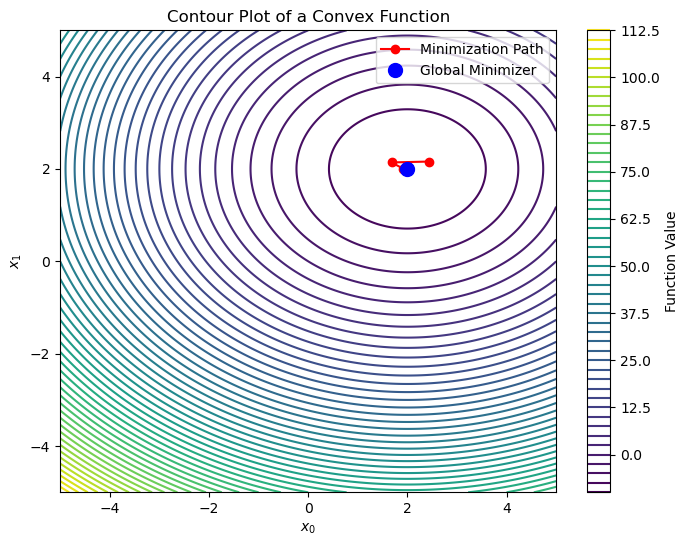

Global minimizer found at: [2.00000041 2.00000002]
Function value at the minimizer: -9.99999999999983


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy.linalg import eigvals

# Define a convex quadratic function (source: ChatGPT)
def convex_function(x, P, q):
    return 0.5 * np.dot(x.T, np.dot(P, x)) + np.dot(q.T, x)

# Gradient of the function
def grad_convex_function(x, P, q):
    return np.dot(P, x) + q

# Hessian of the function
def hessian_convex_function(P):
    return P

# Second-Order Convexity Condition
def is_convex(P):
    return np.all(eigvals(P) >= 0)

# Plot the convex function and the minimization process
def plot_convex_function(P, q):
    # Generate a grid of x values
    x_vals = np.linspace(-5, 5, 400)
    y_vals = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    Z = np.array([convex_function(np.array([x, y]), P, q) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)

    # Plot the function as a contour plot
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Function Value')
    plt.title("Contour Plot of a Convex Function")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")

    # Plot the gradient descent optimization path
    initial_guess = np.array([3.0, 3.0])
    steps = []

    def callback(xk):
        steps.append(xk)

    result = minimize(convex_function, initial_guess, args=(P, q), jac=grad_convex_function, method='BFGS', callback=callback)

    # Extract results and plot the path
    steps = np.array(steps)
    plt.plot(steps[:, 0], steps[:, 1], 'ro-', label='Minimization Path')
    plt.plot(result.x[0], result.x[1], 'bo', label='Global Minimizer', markersize=10)

    plt.legend()
    plt.show()

    return result

# Example Parameters for a Convex Quadratic Function
P = np.array([[2, 0], [0, 3]])  # Positive definite matrix
q = np.array([-4, -6])  # Linear term

# Check convexity of the function by verifying the Hessian
if is_convex(P):
    print("The function is convex (Hessian is positive semi-definite).")
else:
    print("The function is not convex.")

# Plot the convex function and run the optimization
result = plot_convex_function(P, q)


print(f"Global minimizer found at: {result.x}")
print(f"Function value at the minimizer: {result.fun}")


### Gradient Descent

**Gradient descent** is an optimization algorithm that iteratively finds a local minimum of a differentiable function. It is assume that the function is continuously differentiable, and we solve:

$
\min_{x \in \mathbb{R}^d} f(x)
$


### Steepest Descent

The **steepest descent** approach uses the direction in which a function's values decrease most rapidly to find values closer to the global minimum. According to the First-Order Necessary Condition, this equation provides that $-\nabla f(x)$ .


#### Steepest Descent Direction

For any unit vector $ v \in \mathbb{R}^d $:

$
\frac{\partial f(x_0)}{\partial v} \geq \frac{\partial f(x_0)}{\partial v^*}
$

where

$
v^* = -\frac{\nabla f(x_0)}{||\nabla f(x_0)||}
$

This ensures that the steepest descent direction is the negative gradient.


### Iterative Update Rule

Each iteration , we take a step in the direction of the negative gradient (Source: ChapterNotes ):

$
x^{k+1} = x^k - \alpha_k \nabla f(x^k), \quad k = 0, 1, 2, \dots
$

where $ \alpha_k > 0 $ is the step size, and it is chosen to minimize the objective function along the search direction. These step sizes are called **step lengths**.



### Step Size Optimization

The optimal step size $ \alpha_k $ is chosen to minimize:

$
\alpha_k = \arg \min_{\alpha > 0} f(x^k - \alpha \nabla f(x^k))
$

Steepest descent, when started from any initial point $ x^0 $, produces a sequence $ \{x^k\} $ such that if $ \nabla f(x^k) \neq 0 $ (Source: Chapter Notes ):

$
f(x^{k+1}) \leq f(x^k), \quad \forall k \geq 1
$

Optimal solution found: [0.28571867 0.57142638]
Objective function value at optimal solution: -1.4285714285473987


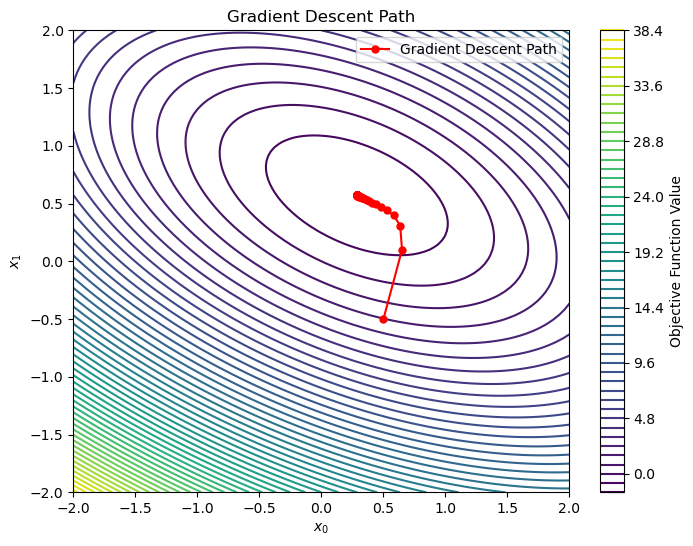

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# A quadratic function to minimize (Source: ChatGPT)
def objective_function(x, A, b):
    """Objective function: 1/2 * x^T A x - b^T x"""
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

# Gradient of the quadratic function
def gradient(x, A, b):
    return np.dot(A, x) - b

# Steepest Descent
def gradient_descent(A, b, x0, learning_rate=0.1, tolerance=1e-6, max_iters=1000):
    x = x0
    history = [x0]  # Store all iterates for visualization
    for i in range(max_iters):
        grad = gradient(x, A, b)
        # Update the solution
        x_next = x - learning_rate * grad
        history.append(x_next)

        # Check for convergence
        if np.linalg.norm(x_next - x) < tolerance:
            break
        x = x_next
    return x, history

# Plot the path of gradient descent on a 2D contour plot (Source: ChatGPT)
def plot_gradient_descent(A, b, history):
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Compute objective function values over the grid
    Z = np.array([objective_function(np.array([x, y]), A, b) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)

    # Plot the contours
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label="Objective Function Value")

    # Plot the gradient descent path
    history = np.array(history)
    plt.plot(history[:, 0], history[:, 1], 'ro-', label="Gradient Descent Path", markersize=5)

    plt.title("Gradient Descent Path")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.legend()
    plt.show()


A = np.array([[3, 2], [2, 6]])  # A positive definite matrix
b = np.array([2, 4])  # Vector b
x0 = np.array([0.5, -0.5])  # Initial guess

# Run gradient descent
learning_rate = 0.1
x_opt, history = gradient_descent(A, b, x0, learning_rate)

# Output the result
print(f"Optimal solution found: {x_opt}")
print(f"Objective function value at optimal solution: {objective_function(x_opt, A, b)}")

# Plot the gradient descent path
plot_gradient_descent(A, b, history)
